# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Nurfian Qodar
- **Email:** 77nurfianqodar@gmail.com
- **ID Dicoding:** nurfianqodar

## Menentukan Pertanyaan Bisnis

- Apakah arah angin (wd) mempengaruhi konsentrasi polutan di udara?
- Apakah curah hujan (RAIN) memiliki pengaruh terhadap konsentrasi polutan di udara?
- Kapan (datetime) dan di daerah (station) mana yang memiliki kualitas udara terburuk?
- Kapan (datetime) dan di daerah (station) mana yang memiliki kualitas udara terbaik?

## Import Semua Packages/Library yang Digunakan

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Data Wrangling

### Gathering Data

#### 1. List Dataset (CSV File)

In [41]:
CSV_DIR = "./data/PRSA_Data_20130301-20170228/"
csv_filename_list = os.listdir(CSV_DIR)
csv_filename_list

['PRSA_Data_Aotizhongxin_20130301-20170228.csv',
 'PRSA_Data_Changping_20130301-20170228.csv',
 'PRSA_Data_Dingling_20130301-20170228.csv',
 'PRSA_Data_Dongsi_20130301-20170228.csv',
 'PRSA_Data_Guanyuan_20130301-20170228.csv',
 'PRSA_Data_Gucheng_20130301-20170228.csv',
 'PRSA_Data_Huairou_20130301-20170228.csv',
 'PRSA_Data_Nongzhanguan_20130301-20170228.csv',
 'PRSA_Data_Shunyi_20130301-20170228.csv',
 'PRSA_Data_Tiantan_20130301-20170228.csv',
 'PRSA_Data_Wanliu_20130301-20170228.csv',
 'PRSA_Data_Wanshouxigong_20130301-20170228.csv']

#### 2. Menggabungkan Semua Dataset

In [42]:
list_df = [
    pd.read_csv(os.path.join(CSV_DIR, filename)) for filename in csv_filename_list
]
df = pd.concat(list_df)
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [43]:
df.tail()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
35059,35060,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong
35060,35061,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong
35061,35062,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong
35062,35063,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong
35063,35064,2017,2,28,23,13.0,19.0,4.0,38.0,600.0,49.0,8.6,1014.1,-15.9,0.0,NNE,1.3,Wanshouxigong


Dataset berhasil terbaca dan digabungkan.

### Assessing Data

#### 1. Memeriksa Missing Value

In [44]:
df.isna().sum()

No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64

Terdapat missing value pada kolom PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, wd, dan WSPM

#### 2. Memeriksa Duplicated Value

In [45]:
sum_duplicated = df.duplicated().sum()
print(f"Total data duplikat: {sum_duplicated}")

Total data duplikat: 0


Tidak ditemukan duplikasi pada data

#### 3. Memeriksa Invalid Data Type

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 420768 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 61.0+ MB


Datetime direpresentasikan sebagai integer dalam kolom year, month, day, dan hour yang terpisah.

### Cleaning Data

#### 1. Normalisasi Datetime

- Membuat kolom datetime

In [47]:
datetime_column =  ["year", "month", "day", "hour"]
df["datetime"] = pd.to_datetime(df[datetime_column])
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,2013-03-01 00:00:00
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,2013-03-01 01:00:00
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,2013-03-01 02:00:00
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,2013-03-01 03:00:00
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,2013-03-01 04:00:00


- Menghapus Data yang memiliki Missing Value

In [48]:
df.dropna(inplace=True)
df.isna().sum()

No          0
year        0
month       0
day         0
hour        0
PM2.5       0
PM10        0
SO2         0
NO2         0
CO          0
O3          0
TEMP        0
PRES        0
DEWP        0
RAIN        0
wd          0
WSPM        0
station     0
datetime    0
dtype: int64

- Membuat kolom Konsentrasi Polutan yang menggabungkan konsentrasi dari semua polutan

Hal ini bisa dilakukan karena konsentrasi polutan memiliki satuan yang sama

In [49]:
df["POLUTANT"] = df["PM2.5"] + df["PM10"] + df["SO2"] + df["NO2"] + df["CO"] + df["O3"]

df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime,POLUTANT
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,2013-03-01 00:00:00,396.0
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,2013-03-01 01:00:00,404.0
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,2013-03-01 02:00:00,402.0
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,2013-03-01 03:00:00,406.0
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,2013-03-01 04:00:00,402.0


- Membuat kolom wd dalam derajat agar bisa dihitung korelasinya

In [50]:
wd_mapping = {
    'N': 0, 'NNE': 22.5, 'NE': 45, 'ENE': 67.5,
    'E': 90, 'ESE': 112.5, 'SE': 135, 'SSE': 157.5,
    'S': 180, 'SSW': 202.5, 'SW': 225, 'WSW': 247.5,
    'W': 270, 'WNW': 292.5, 'NW': 315, 'NNW': 337.5
}

df["wd_in_deg"] = df["wd"].map(wd_mapping)

- Menghapus kolom yang tidak diperlukan

In [51]:
unused_cols = ["No", "year", "month", "day", "hour", "TEMP", "PRES", "DEWP", "WSPM"]
df.drop(columns=unused_cols, axis=1, inplace=True)
df.head()

,PM2.5,PM10,SO2,NO2,CO,O3,RAIN,wd,station,datetime,POLUTANT,wd_in_deg
0,4.0,4.0,4.0,7.0,300.0,77.0,0.0,NNW,Aotizhongxin,2013-03-01 00:00:00,396.0,337.5
1,8.0,8.0,4.0,7.0,300.0,77.0,0.0,N,Aotizhongxin,2013-03-01 01:00:00,404.0,0.0
2,7.0,7.0,5.0,10.0,300.0,73.0,0.0,NNW,Aotizhongxin,2013-03-01 02:00:00,402.0,337.5
3,6.0,6.0,11.0,11.0,300.0,72.0,0.0,NW,Aotizhongxin,2013-03-01 03:00:00,406.0,315.0
4,3.0,3.0,12.0,12.0,300.0,72.0,0.0,N,Aotizhongxin,2013-03-01 04:00:00,402.0,0.0


- Memisahkan kembali dataframe berdasarkan nama daerah dan melakukan resample menjadi data bulanan

In [52]:
station_list = df["station"].unique()

df_by_station = {}

print("Station List:")
for station in station_list:
    print(f"- {station}")
    df_by_station[station] = df.loc[df["station"] == station]

Station List:
- Aotizhongxin
- Changping
- Dingling
- Dongsi
- Guanyuan
- Gucheng
- Huairou
- Nongzhanguan
- Shunyi
- Tiantan
- Wanliu
- Wanshouxigong


In [53]:
def normalize(df):
    df = df.set_index("datetime")
    
    df_resampled = df.resample("ME").agg({
        "station": lambda st: st.unique()[0] if len(st.unique()) > 0 else None,
        "wd": lambda wd: wd.mode().iloc[0] if not wd.mode().empty else None,
        "wd_in_deg": "mean",
        "RAIN": "mean",
        "PM2.5": "mean",
        "PM10": "mean",
        "SO2": "mean",
        "NO2": "mean",
        "CO": "mean",
        "O3": "mean",
        "POLUTANT": "mean",
    })

    df_resampled.dropna(inplace = True)
    
    return df_resampled



In [54]:
df_aot = normalize(df_by_station["Aotizhongxin"])
df_aot.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2013-03-31 to 2017-02-28
Freq: ME
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   station    48 non-null     object 
 1   wd         48 non-null     object 
 2   wd_in_deg  48 non-null     float64
 3   RAIN       48 non-null     float64
 4   PM2.5      48 non-null     float64
 5   PM10       48 non-null     float64
 6   SO2        48 non-null     float64
 7   NO2        48 non-null     float64
 8   CO         48 non-null     float64
 9   O3         48 non-null     float64
 10  POLUTANT   48 non-null     float64
dtypes: float64(9), object(2)
memory usage: 4.5+ KB


In [55]:
df_cha = normalize(df_by_station["Changping"])
df_cha.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2013-03-31 to 2017-02-28
Freq: ME
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   station    48 non-null     object 
 1   wd         48 non-null     object 
 2   wd_in_deg  48 non-null     float64
 3   RAIN       48 non-null     float64
 4   PM2.5      48 non-null     float64
 5   PM10       48 non-null     float64
 6   SO2        48 non-null     float64
 7   NO2        48 non-null     float64
 8   CO         48 non-null     float64
 9   O3         48 non-null     float64
 10  POLUTANT   48 non-null     float64
dtypes: float64(9), object(2)
memory usage: 4.5+ KB


In [56]:
df_din = normalize(df_by_station["Dingling"])
df_din.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 47 entries, 2013-03-31 to 2017-02-28
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   station    47 non-null     object 
 1   wd         47 non-null     object 
 2   wd_in_deg  47 non-null     float64
 3   RAIN       47 non-null     float64
 4   PM2.5      47 non-null     float64
 5   PM10       47 non-null     float64
 6   SO2        47 non-null     float64
 7   NO2        47 non-null     float64
 8   CO         47 non-null     float64
 9   O3         47 non-null     float64
 10  POLUTANT   47 non-null     float64
dtypes: float64(9), object(2)
memory usage: 4.4+ KB


In [57]:
df_don = normalize(df_by_station["Dongsi"])
df_don.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 47 entries, 2013-03-31 to 2017-02-28
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   station    47 non-null     object 
 1   wd         47 non-null     object 
 2   wd_in_deg  47 non-null     float64
 3   RAIN       47 non-null     float64
 4   PM2.5      47 non-null     float64
 5   PM10       47 non-null     float64
 6   SO2        47 non-null     float64
 7   NO2        47 non-null     float64
 8   CO         47 non-null     float64
 9   O3         47 non-null     float64
 10  POLUTANT   47 non-null     float64
dtypes: float64(9), object(2)
memory usage: 4.4+ KB


In [58]:
df_gua = normalize(df_by_station["Guanyuan"])
df_gua.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2013-03-31 to 2017-02-28
Freq: ME
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   station    48 non-null     object 
 1   wd         48 non-null     object 
 2   wd_in_deg  48 non-null     float64
 3   RAIN       48 non-null     float64
 4   PM2.5      48 non-null     float64
 5   PM10       48 non-null     float64
 6   SO2        48 non-null     float64
 7   NO2        48 non-null     float64
 8   CO         48 non-null     float64
 9   O3         48 non-null     float64
 10  POLUTANT   48 non-null     float64
dtypes: float64(9), object(2)
memory usage: 4.5+ KB


In [59]:
df_guc = normalize(df_by_station["Gucheng"])
df_guc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2013-03-31 to 2017-02-28
Freq: ME
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   station    48 non-null     object 
 1   wd         48 non-null     object 
 2   wd_in_deg  48 non-null     float64
 3   RAIN       48 non-null     float64
 4   PM2.5      48 non-null     float64
 5   PM10       48 non-null     float64
 6   SO2        48 non-null     float64
 7   NO2        48 non-null     float64
 8   CO         48 non-null     float64
 9   O3         48 non-null     float64
 10  POLUTANT   48 non-null     float64
dtypes: float64(9), object(2)
memory usage: 4.5+ KB


In [60]:
df_hua = normalize(df_by_station["Huairou"])
df_hua.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2013-03-31 to 2017-02-28
Freq: ME
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   station    48 non-null     object 
 1   wd         48 non-null     object 
 2   wd_in_deg  48 non-null     float64
 3   RAIN       48 non-null     float64
 4   PM2.5      48 non-null     float64
 5   PM10       48 non-null     float64
 6   SO2        48 non-null     float64
 7   NO2        48 non-null     float64
 8   CO         48 non-null     float64
 9   O3         48 non-null     float64
 10  POLUTANT   48 non-null     float64
dtypes: float64(9), object(2)
memory usage: 4.5+ KB


In [61]:
df_non = normalize(df_by_station["Nongzhanguan"])
df_non.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2013-03-31 to 2017-02-28
Freq: ME
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   station    48 non-null     object 
 1   wd         48 non-null     object 
 2   wd_in_deg  48 non-null     float64
 3   RAIN       48 non-null     float64
 4   PM2.5      48 non-null     float64
 5   PM10       48 non-null     float64
 6   SO2        48 non-null     float64
 7   NO2        48 non-null     float64
 8   CO         48 non-null     float64
 9   O3         48 non-null     float64
 10  POLUTANT   48 non-null     float64
dtypes: float64(9), object(2)
memory usage: 4.5+ KB


In [62]:
df_shu = normalize(df_by_station["Shunyi"])
df_shu.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2013-03-31 to 2017-02-28
Freq: ME
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   station    48 non-null     object 
 1   wd         48 non-null     object 
 2   wd_in_deg  48 non-null     float64
 3   RAIN       48 non-null     float64
 4   PM2.5      48 non-null     float64
 5   PM10       48 non-null     float64
 6   SO2        48 non-null     float64
 7   NO2        48 non-null     float64
 8   CO         48 non-null     float64
 9   O3         48 non-null     float64
 10  POLUTANT   48 non-null     float64
dtypes: float64(9), object(2)
memory usage: 4.5+ KB


In [63]:
df_tia = normalize(df_by_station["Tiantan"])

df_tia.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2013-03-31 to 2017-02-28
Freq: ME
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   station    48 non-null     object 
 1   wd         48 non-null     object 
 2   wd_in_deg  48 non-null     float64
 3   RAIN       48 non-null     float64
 4   PM2.5      48 non-null     float64
 5   PM10       48 non-null     float64
 6   SO2        48 non-null     float64
 7   NO2        48 non-null     float64
 8   CO         48 non-null     float64
 9   O3         48 non-null     float64
 10  POLUTANT   48 non-null     float64
dtypes: float64(9), object(2)
memory usage: 4.5+ KB


In [64]:
df_wan = normalize(df_by_station["Wanliu"])

df_wan.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2013-03-31 to 2017-02-28
Freq: ME
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   station    48 non-null     object 
 1   wd         48 non-null     object 
 2   wd_in_deg  48 non-null     float64
 3   RAIN       48 non-null     float64
 4   PM2.5      48 non-null     float64
 5   PM10       48 non-null     float64
 6   SO2        48 non-null     float64
 7   NO2        48 non-null     float64
 8   CO         48 non-null     float64
 9   O3         48 non-null     float64
 10  POLUTANT   48 non-null     float64
dtypes: float64(9), object(2)
memory usage: 4.5+ KB


In [65]:
df_was = normalize(df_by_station["Wanshouxigong"])
df_was.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2013-03-31 to 2017-02-28
Freq: ME
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   station    48 non-null     object 
 1   wd         48 non-null     object 
 2   wd_in_deg  48 non-null     float64
 3   RAIN       48 non-null     float64
 4   PM2.5      48 non-null     float64
 5   PM10       48 non-null     float64
 6   SO2        48 non-null     float64
 7   NO2        48 non-null     float64
 8   CO         48 non-null     float64
 9   O3         48 non-null     float64
 10  POLUTANT   48 non-null     float64
dtypes: float64(9), object(2)
memory usage: 4.5+ KB


- Gabungan Clean Dataframe

In [66]:
all_clean_df = pd.concat([df_aot, df_cha, df_din, df_don, df_gua, df_guc, df_hua, df_non, df_shu, df_tia])
all_clean_df.to_csv("./data/all_data.csv", index=True)
all_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 478 entries, 2013-03-31 to 2017-02-28
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   station    478 non-null    object 
 1   wd         478 non-null    object 
 2   wd_in_deg  478 non-null    float64
 3   RAIN       478 non-null    float64
 4   PM2.5      478 non-null    float64
 5   PM10       478 non-null    float64
 6   SO2        478 non-null    float64
 7   NO2        478 non-null    float64
 8   CO         478 non-null    float64
 9   O3         478 non-null    float64
 10  POLUTANT   478 non-null    float64
dtypes: float64(9), object(2)
memory usage: 44.8+ KB


## Exploratory Data Analysis (EDA)

### Eksplorasi Mencari Pengaruh Arah Angin Terhadap Konsentrasi Polutan

In [67]:
all_clean_df[["wd_in_deg", "POLUTANT"]].corr()

,wd_in_deg,POLUTANT
wd_in_deg,1.000000,-0.214582
POLUTANT,-0.214582,1.000000


Nilai korelasi sebesar -0.19433 menunjukkan adanya korelasi negatif yang sangat lemah antara wd_in_deg dan POLUTANT.
Ini berarti bahwa perubahan dalam arah angin (dalam derajat) hanya sedikit mempengaruhi konsentrasi polutan. Korelasi negatif yang lemah menunjukkan bahwa meskipun ada hubungan, kekuatannya kecil dan tidak signifikan.

### Eksplorasi Mencari Pengaruh Curah Hujan Terhadap Konsentrasi Polutan

In [68]:
all_clean_df[["RAIN", "POLUTANT"]].corr()

,RAIN,POLUTANT
RAIN,1.000000,-0.389788
POLUTANT,-0.389788,1.000000


Nilai korelasi sebesar -0.350329 menunjukkan adanya korelasi negatif sedang antara RAIN dan POLUTANT.
Ini berarti bahwa ketika curah hujan meningkat, konsentrasi polutan cenderung menurun, meskipun hubungan ini tidak sangat kuat. Korelasi negatif menunjukkan bahwa ada kecenderungan bahwa curah hujan dan konsentrasi polutan bergerak dalam arah yang berlawanan, tetapi tidak secara signifikan atau secara konsisten.

### Eksplorasi Mencari Daerah dan Waktu dengan Kualitas Udara Paling Buruk

In [69]:
highest_polutant = all_clean_df["POLUTANT"].max()
highest_polutant

np.float64(3674.3212795549375)

In [70]:
worst = all_clean_df.loc[all_clean_df["POLUTANT"] == highest_polutant]
worst

,station,wd,wd_in_deg,RAIN,PM2.5,PM10,SO2,NO2,CO,O3,POLUTANT
datetime,,,,,,,,,,,
2015-12-31,Gucheng,WNW,183.661335,0.005563,165.760779,179.0,23.343533,74.429764,3218.91516,12.872045,3674.32128


In [71]:
print(f"""
{worst["station"].iloc[0]} adalah daerah dengan kualitas udara terburuk pada {worst.index.strftime("%m-%Y")[0]}.
Konsentrasi polutan yang terkandung adalah {worst["POLUTANT"].iloc[0]}.
""")


Gucheng adalah daerah dengan kualitas udara terburuk pada 12-2015.
Konsentrasi polutan yang terkandung adalah 3674.3212795549375.



### Eksplorasi Mencari Daerah dan Waktu dengan Kualitas Udara Paling Baik

In [72]:
lowest_polutant = all_clean_df["POLUTANT"].min()
lowest_polutant

np.float64(624.0857605177994)

In [73]:
good = all_clean_df.loc[all_clean_df["POLUTANT"] == lowest_polutant]
good

,station,wd,wd_in_deg,RAIN,PM2.5,PM10,SO2,NO2,CO,O3,POLUTANT
datetime,,,,,,,,,,,
2016-09-30,Dingling,NW,189.93932,0.077184,43.666667,50.635922,2.86246,12.042071,443.203883,71.674757,624.085761


In [74]:
print(f"""
{good["station"].iloc[0]} adalah daerah dengan kualitas udara terbaik pada {good.index.strftime("%m-%Y")[0]}.
Konsentrasi polutan yang terkandung adalah {good["POLUTANT"].iloc[0]}.
""")


Dingling adalah daerah dengan kualitas udara terbaik pada 09-2016.
Konsentrasi polutan yang terkandung adalah 624.0857605177994.



## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah arah angin (wd) mempengaruhi konsentrasi polutan di udara?

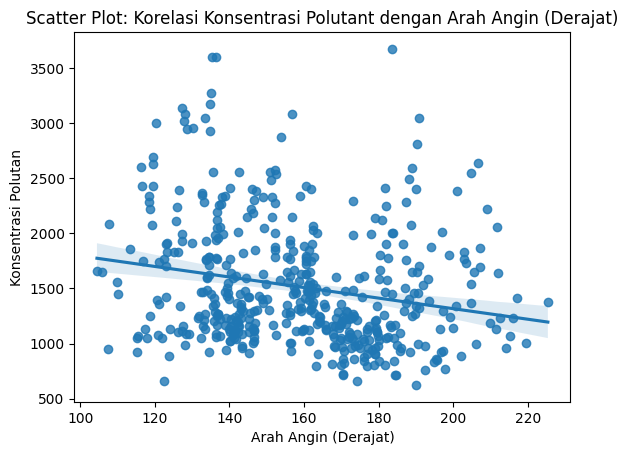

In [75]:
sns.regplot(x="wd_in_deg", y="POLUTANT", data=all_clean_df)
plt.title('Scatter Plot: Korelasi Konsentrasi Polutant dengan Arah Angin (Derajat)')
plt.xlabel('Arah Angin (Derajat)')
plt.ylabel('Konsentrasi Polutan')
plt.show()


Terlihat bahwa distribusi data tidak mengikuti garis regresi menandakan bahwa korelasi yang sangat kecil antara arah angin dengan konsentrasi polutan di udara atau kualitas udara.

### Pertanyaan 2: Apakah curah hujan (RAIN) memiliki pengaruh terhadap konsentrasi polutan di udara?

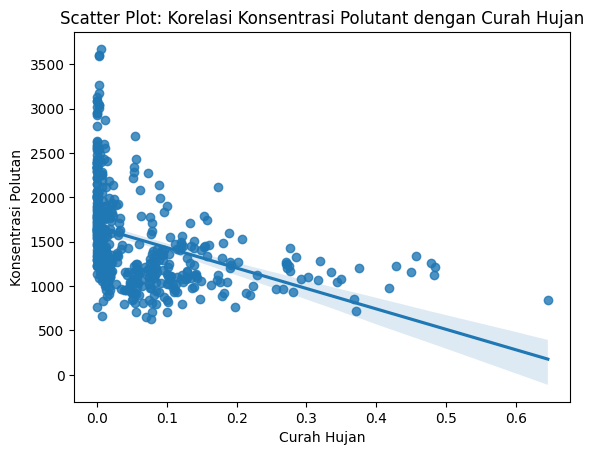

In [76]:
sns.regplot(x="RAIN", y="POLUTANT", data=all_clean_df)
plt.title('Scatter Plot: Korelasi Konsentrasi Polutant dengan Curah Hujan')
plt.xlabel('Curah Hujan')
plt.ylabel('Konsentrasi Polutan')
plt.show()

Terlihat pada scatterplot tersebut, saat curah hujan 0 atau musim kemarau, banyak data yang menunjukkan bahwa konsentrasi polutan meningkat.

### Pertanyaan 3 dan 4: Kapan dan Dimana Daerah Dengan Kualitas Udara Terburuk dan Terbaik

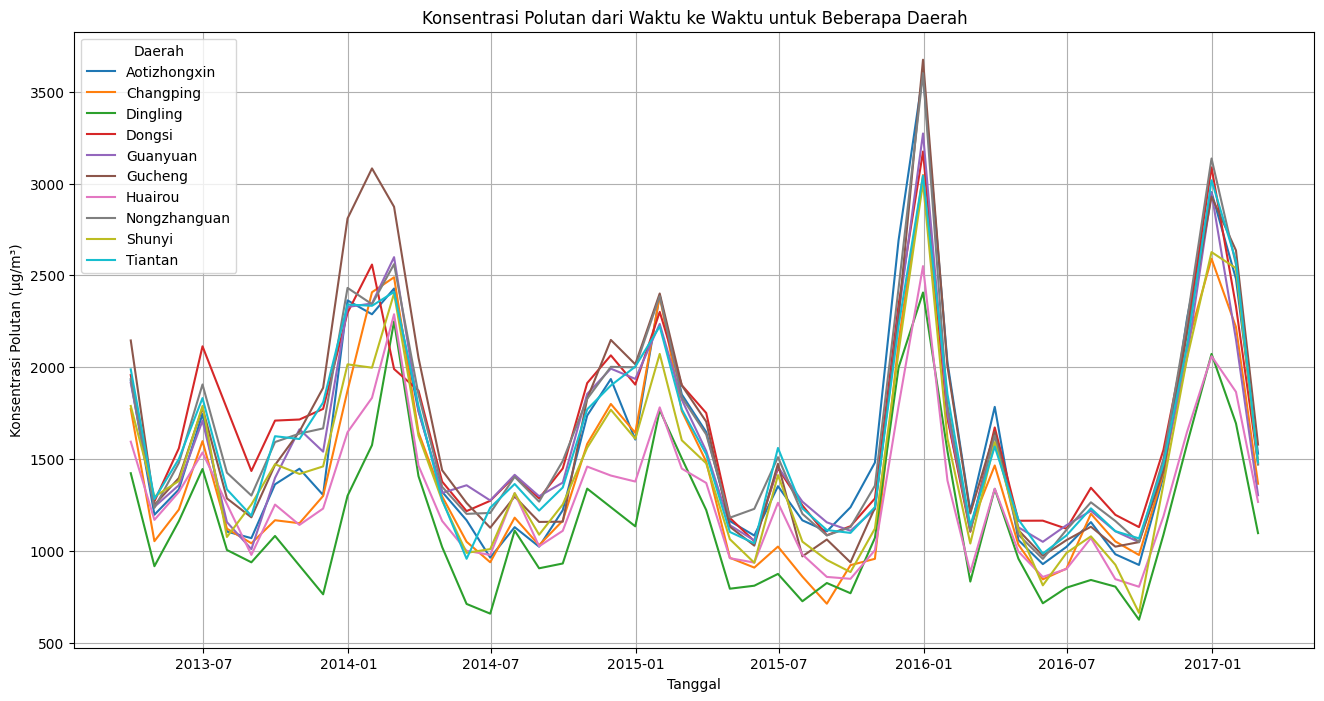

In [77]:
plt.figure(figsize=(16, 8))
sns.lineplot(data=all_clean_df, x=all_clean_df.index, y='POLUTANT', hue='station', palette='tab10')

plt.title('Konsentrasi Polutan dari Waktu ke Waktu untuk Beberapa Daerah')
plt.xlabel('Tanggal')
plt.ylabel('Konsentrasi Polutan (µg/m³)')
plt.grid(True)
plt.legend(title='Daerah')
plt.show()

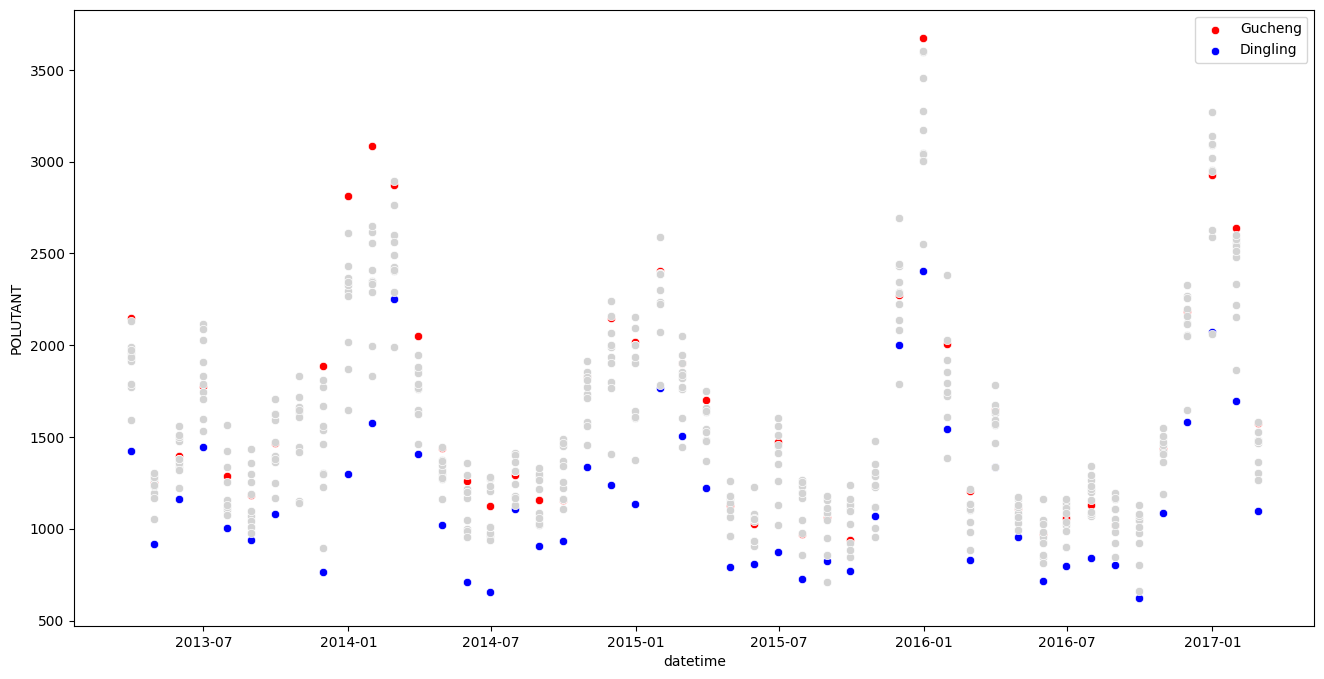

In [78]:
plt.figure(figsize=(16, 8))
sns.scatterplot(x=df_guc.index.unique(), y=df_guc["POLUTANT"], facecolor = "red", label = "Gucheng")
sns.scatterplot(x=df_din.index.unique(), y=df_din["POLUTANT"], facecolor = "blue", label = "Dingling")
sns.scatterplot(x=df_aot.index.unique(), y=df_aot["POLUTANT"], facecolor = "lightgrey")
sns.scatterplot(x=df_cha.index.unique(), y=df_cha["POLUTANT"], facecolor = "lightgrey")
sns.scatterplot(x=df_don.index.unique(), y=df_don["POLUTANT"], facecolor = "lightgrey")
sns.scatterplot(x=df_gua.index.unique(), y=df_gua["POLUTANT"], facecolor = "lightgrey")
sns.scatterplot(x=df_hua.index.unique(), y=df_hua["POLUTANT"], facecolor = "lightgrey")
sns.scatterplot(x=df_non.index.unique(), y=df_non["POLUTANT"], facecolor = "lightgrey")
sns.scatterplot(x=df_shu.index.unique(), y=df_shu["POLUTANT"], facecolor = "lightgrey")
sns.scatterplot(x=df_tia.index.unique(), y=df_tia["POLUTANT"], facecolor = "lightgrey")
sns.scatterplot(x=df_wan.index.unique(), y=df_wan["POLUTANT"], facecolor = "lightgrey")
sns.scatterplot(x=df_was.index.unique(), y=df_was["POLUTANT"], facecolor = "lightgrey")
plt.show()

Terlihat bahwa hasil analisis di station Dingling memiliki kualitas udara yang baik dengan konsentrasi polutan rendah.

Sebaliknya, di station Gucheng kulaitas udaranya buruk dengan konsentrasi polutan yang tinggi.

## Conclusion

- Arah angin tidak memiliki pengaruh terhadap kualitas udara di suatu daerah.
- Curah hujan memiliki pengaruh sedang terhadap kualitas udara di suatu daerah, semakin rendah curah hujan maka semakin buruk kualitas udara pada daerah tersebut.
- Gucheng adalah daerah dengan kualitas udara terburuk pada 12-2015.
Konsentrasi polutan yang terkandung adalah 3674.3212795549375.
- Dingling adalah daerah dengan kualitas udara terbaik pada 09-2016.
Konsentrasi polutan yang terkandung adalah 624.0857605177994.